In [1]:
#import important programs
import numpy as np
import pandas as pd
import sqlalchemy as sal
from sqlalchemy import create_engine
import pymysql
import pandas_profiling as pp

D:\Users\jryba\anaconda3\envs\DataAnalyticsCourse\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
#data from sql didnt work, used downloaded file
data = pd.read_csv('credit.csv')
pd.set_option('display.max_columns',None)
data.head()

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


The data was originally supposed to come from a SQL database. This resulted in an error, so I got it from a .csv file instead

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30204 entries, 0 to 30203
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MyUnknownColumn  30203 non-null  object
 1   X1               30204 non-null  object
 2   X2               30204 non-null  object
 3   X3               30204 non-null  object
 4   X4               30204 non-null  object
 5   X5               30204 non-null  object
 6   X6               30204 non-null  object
 7   X7               30204 non-null  object
 8   X8               30204 non-null  object
 9   X9               30204 non-null  object
 10  X10              30204 non-null  object
 11  X11              30204 non-null  object
 12  X12              30204 non-null  object
 13  X13              30204 non-null  object
 14  X14              30204 non-null  object
 15  X15              30204 non-null  object
 16  X16              30204 non-null  object
 17  X17              30204 non-null

Row index 0 is what we want the columns to be named. Change column names to indexed names and delete index 0

In [14]:
data.columns = ['ID', 'Limit_bal', 'Gender', 'Education', 'Marriage', 'Age', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_Amt1', 'Bill_Amt2', 'Bill_Amt3', 'Bill_Amt4', 'Bill_Amt5', 'Bill_Amt6', 'Pay_Amt1', 'Pay_Amt2', 'Pay_Amt3', 'Pay_Amt4', 'Pay_Amt5', 'Pay_Amt6', 'Default']
data = data.drop(index=[0])
data = data.dropna()
data.head()

,ID,Limit_bal,Gender,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default
1,1,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,5,50000,male,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [15]:
data = data.drop_duplicates()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 1 to 30203
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30001 non-null  object
 1   Limit_bal  30001 non-null  object
 2   Gender     30001 non-null  object
 3   Education  30001 non-null  object
 4   Marriage   30001 non-null  object
 5   Age        30001 non-null  object
 6   Pay_1      30001 non-null  object
 7   Pay_2      30001 non-null  object
 8   Pay_3      30001 non-null  object
 9   Pay_4      30001 non-null  object
 10  Pay_5      30001 non-null  object
 11  Pay_6      30001 non-null  object
 12  Bill_Amt1  30001 non-null  object
 13  Bill_Amt2  30001 non-null  object
 14  Bill_Amt3  30001 non-null  object
 15  Bill_Amt4  30001 non-null  object
 16  Bill_Amt5  30001 non-null  object
 17  Bill_Amt6  30001 non-null  object
 18  Pay_Amt1   30001 non-null  object
 19  Pay_Amt2   30001 non-null  object
 20  Pay_Amt3   30001 non-null  o

,ID,Limit_bal,Gender,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,5,5,57,12,12,12,12,11,11,22724,22347,22027,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,1,50000,female,university,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,not default
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


Seems to be one more index with each column name. Is there one null entry as well?

In [16]:
#checking for null entries
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 1 to 30203
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30001 non-null  object
 1   Limit_bal  30001 non-null  object
 2   Gender     30001 non-null  object
 3   Education  30001 non-null  object
 4   Marriage   30001 non-null  object
 5   Age        30001 non-null  object
 6   Pay_1      30001 non-null  object
 7   Pay_2      30001 non-null  object
 8   Pay_3      30001 non-null  object
 9   Pay_4      30001 non-null  object
 10  Pay_5      30001 non-null  object
 11  Pay_6      30001 non-null  object
 12  Bill_Amt1  30001 non-null  object
 13  Bill_Amt2  30001 non-null  object
 14  Bill_Amt3  30001 non-null  object
 15  Bill_Amt4  30001 non-null  object
 16  Bill_Amt5  30001 non-null  object
 17  Bill_Amt6  30001 non-null  object
 18  Pay_Amt1   30001 non-null  object
 19  Pay_Amt2   30001 non-null  object
 20  Pay_Amt3   30001 non-null  o

30001 entries, 30001 non-null in each column - no null entries

In [17]:
#Finding index with entries preventing object type change to integer
#Choose integer column (ID), change to string. 
data['ID'] = data['ID'].astype('string')
#Look for entries where string entries are not digits. Create new boolean column, digit entries are true, non-digit are false
data['ID2'] = data['ID'].str.isdigit()
#Locate entries in new column that are false
data.loc[data['ID2'] == False]

,ID,Limit_bal,Gender,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default,ID2
203,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,False


Had some trouble here with trying to identify which row(s) had the incorrect information. I tried to do it by searching rows for the odd values but got errors. Eventually just made an extra boolean column and deleted it later.

In [18]:
#print index found to have non-integer entries (I know it's a duplicate, just for me to remember how to print specific indexes) 
print(data.loc[[203]])

     ID  Limit_bal Gender  Education  Marriage  Age  Pay_1  Pay_2  Pay_3  \
203  ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   

     Pay_4  Pay_5  Pay_6  Bill_Amt1  Bill_Amt2  Bill_Amt3  Bill_Amt4  \
203  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4   

     Bill_Amt5  Bill_Amt6  Pay_Amt1  Pay_Amt2  Pay_Amt3  Pay_Amt4  Pay_Amt5  \
203  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5   

     Pay_Amt6                     Default    ID2  
203  PAY_AMT6  default payment next month  False  


Entry 203 seems to be duplicate of column names, can be deleted

In [19]:
#deleting entry 203
data = data.drop(index=203)

In [20]:
#referencing column names to change data type
data.head()

,ID,Limit_bal,Gender,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default,ID2
1,1,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,default,True
2,2,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,default,True
3,3,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default,True
4,4,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default,True
5,5,50000,male,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,not default,True


In [21]:
#changing data types in columns with integer entries
data['ID']=data['ID'].astype('int')
data['Marriage']=data['Marriage'].astype('int')
data['Limit_bal']=data['Limit_bal'].astype('int')
data['Age']=data['Age'].astype('int')
data['Pay_1']=data['Pay_1'].astype('int')
data['Pay_2']=data['Pay_2'].astype('int')
data['Pay_3']=data['Pay_3'].astype('int')
data['Pay_4']=data['Pay_4'].astype('int')
data['Pay_5']=data['Pay_5'].astype('int')
data['Pay_6']=data['Pay_6'].astype('int')
data['Bill_Amt1']=data['Bill_Amt1'].astype('int')
data['Bill_Amt2']=data['Bill_Amt2'].astype('int')
data['Bill_Amt3']=data['Bill_Amt3'].astype('int')
data['Bill_Amt4']=data['Bill_Amt4'].astype('int')
data['Bill_Amt5']=data['Bill_Amt5'].astype('int')
data['Bill_Amt6']=data['Bill_Amt6'].astype('int')
data['Pay_Amt1']=data['Pay_Amt1'].astype('int')
data['Pay_Amt2']=data['Pay_Amt2'].astype('int')
data['Pay_Amt3']=data['Pay_Amt3'].astype('int')
data['Pay_Amt4']=data['Pay_Amt4'].astype('int')
data['Pay_Amt5']=data['Pay_Amt5'].astype('int')
data['Pay_Amt6']=data['Pay_Amt6'].astype('int')
data = data.drop(columns = 'ID2')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30203
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int32 
 1   Limit_bal  30000 non-null  int32 
 2   Gender     30000 non-null  object
 3   Education  30000 non-null  object
 4   Marriage   30000 non-null  int32 
 5   Age        30000 non-null  int32 
 6   Pay_1      30000 non-null  int32 
 7   Pay_2      30000 non-null  int32 
 8   Pay_3      30000 non-null  int32 
 9   Pay_4      30000 non-null  int32 
 10  Pay_5      30000 non-null  int32 
 11  Pay_6      30000 non-null  int32 
 12  Bill_Amt1  30000 non-null  int32 
 13  Bill_Amt2  30000 non-null  int32 
 14  Bill_Amt3  30000 non-null  int32 
 15  Bill_Amt4  30000 non-null  int32 
 16  Bill_Amt5  30000 non-null  int32 
 17  Bill_Amt6  30000 non-null  int32 
 18  Pay_Amt1   30000 non-null  int32 
 19  Pay_Amt2   30000 non-null  int32 
 20  Pay_Amt3   30000 non-null  i

Had trouble keeping track of which column was which. Eventually went back up to change Pay_0 to Pay_1 for my own sanity.

In [22]:
#Changing non-integer entries to integers and changing data types to integer
data['Gender']=data['Gender'].replace('female','1')
data['Gender']=data['Gender'].replace('male','2')
data['Gender']=data['Gender'].astype('int')
data['Education']=data['Education'].replace('other','1')
data['Education']=data['Education'].replace('high school','2')
data['Education']=data['Education'].replace('university','3')
data['Education']=data['Education'].replace('graduate school','4')
data['Education']=data['Education'].astype('int')
data['Default']=data['Default'].replace('not default','1')
data['Default']=data['Default'].replace('default','2')
data['Default']=data['Default'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30203
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int32
 1   Limit_bal  30000 non-null  int32
 2   Gender     30000 non-null  int32
 3   Education  30000 non-null  int32
 4   Marriage   30000 non-null  int32
 5   Age        30000 non-null  int32
 6   Pay_1      30000 non-null  int32
 7   Pay_2      30000 non-null  int32
 8   Pay_3      30000 non-null  int32
 9   Pay_4      30000 non-null  int32
 10  Pay_5      30000 non-null  int32
 11  Pay_6      30000 non-null  int32
 12  Bill_Amt1  30000 non-null  int32
 13  Bill_Amt2  30000 non-null  int32
 14  Bill_Amt3  30000 non-null  int32
 15  Bill_Amt4  30000 non-null  int32
 16  Bill_Amt5  30000 non-null  int32
 17  Bill_Amt6  30000 non-null  int32
 18  Pay_Amt1   30000 non-null  int32
 19  Pay_Amt2   30000 non-null  int32
 20  Pay_Amt3   30000 non-null  int32
 21  Pay_Amt4   3

All columns are now integer types. Noting non-integer column integer equivalents

Gender: female = 1, male = 2

Education: other = 1, high school = 2, university = 3, graduate school = 4

Default: not default = 1, default = 2

The company wants to know how much balance to give future creditors, or at the very least, determine who will likely default and who likely won't. The dependent variables, then, would be the limit balance (limit_bal) and default columns. Everything else would be independent.

In [24]:
#import graphing packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Creating and graphing correlation matrix
corr_mat = data.corr()
corr_mat.style.background_gradient(cmap='rocket')

,ID,Limit_bal,Gender,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default
ID,1.000000,0.026179,-0.018497,-0.037659,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
Limit_bal,0.026179,1.000000,-0.024755,0.231088,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
Gender,-0.018497,-0.024755,1.000000,0.013627,0.031389,0.090874,0.057643,0.070771,0.066096,0.060173,0.055064,0.044008,0.033642,0.031183,0.024563,0.021880,0.017005,0.016733,0.000242,0.001391,0.008597,0.002229,0.001667,0.002766,0.039961
Education,-0.037659,0.231088,0.013627,1.000000,0.149134,-0.182434,-0.112593,-0.129703,-0.122425,-0.116531,-0.104088,-0.088986,-0.016597,-0.011980,-0.006714,0.006131,0.012439,0.012646,0.041088,0.032793,0.044293,0.040949,0.045138,0.044061,-0.033842
Marriage,-0.029079,-0.108139,0.031389,0.149134,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
Age,0.018678,0.144713,0.090874,-0.182434,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
Pay_1,-0.030575,-0.271214,0.057643,-0.112593,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
Pay_2,-0.011215,-0.296382,0.070771,-0.129703,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
Pay_3,-0.018494,-0.286123,0.066096,-0.122425,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
Pay_4,-0.002735,-0.267460,0.060173,-0.116531,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


Limit Balance seems to have a positive correlation with education, age, bill amount and pay amount, and a negative correlation with pay and default

Default seems to have a positive correlation with pay and a negative correlation with limit balance

The regular correlation matrix doesn't do much for me so I made a pretty one with fancy colors. Helped me see the correlation a lot better

In [26]:
data['Default'].describe()

count    30000.000000
mean         1.221200
std          0.415062
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Default, dtype: float64

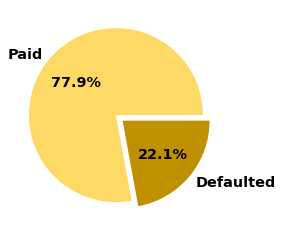

In [29]:
default_count = data['Default'].value_counts()
labels=(['Paid','Defaulted'])

ax=plt.pie(x=default_count, colors=['#FFD966','#BF9000'], labels=labels, autopct='%.1f%%', 
           textprops={'size':'x-large','fontweight':'bold'}, explode=(0,0.1))
plt.savefig('Default_Perc_Pie.png', bbox_inches='tight', dpi=300, transparent=True)

Had a lot of fun (and errors) making this one. It was my first pie graph and the first plot I made that was transparent! Eventually had to find some example codes online and piece the individual parameters together.

Overall, didn't have too much trouble cleaning and analyzing the data. Putting the powerpoint together was the hard part!